In [39]:
from openbb import obb
import riskfolio as rp
import yfinance as yf
import pandas as pd
import numpy as np

In [36]:
yf.pdr_override()

In [2]:
pd.options.display.float_format = '{:.4%}'.format

In [43]:
# Date range
start = '2016-01-01'
end = '2024-12-30'

# Tickers of assets
tickers = ["AAPL", "^GDAXI", "NVDA"]
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

/home/viktor/python/projects/venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/viktor/python/projects/venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/viktor/python/projects/venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  3 of 3 completed


In [44]:
assets = data.pct_change().dropna()

Y = assets

/tmp/ipykernel_23748/239009634.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  assets = data.pct_change().dropna()


In [75]:
# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MV'  # Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)
# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = w

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

In [3]:
# obb.user.credentials.fmp_api_key = "c20bb49f027813971f78c2eb832cb160"
# output = obb.equity.price.historical("NVDA", start_date="2010-01-01", end_date="2024-03-01")
# nvda = output.to_dataframe()
# nvda_returns = nvda["adj_close"].pct_change()
# nvda_returns.plot()
# nvda_returns.plot()
# portfolio = rp.Portfolio(returns=Y)
# # Choose the risk measure
# rm = 'MSV'  # Semi Standard Deviation

# # Estimate inputs of the model (historical estimates)
# method_mu='hist' # Method to estimate expected returns based on historical data.
# method_cov='hist' # Method to estimate covariance matrix based on historical data.

# portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# # Estimate the portfolio that maximizes the risk adjusted return ratio
# w1 = portfolio.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# # Estimate points in the efficient frontier mean - semi standard deviation
# ws = portfolio.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# # Estimate the risk parity portfolio for semi standard deviation
# w2 = portfolio.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

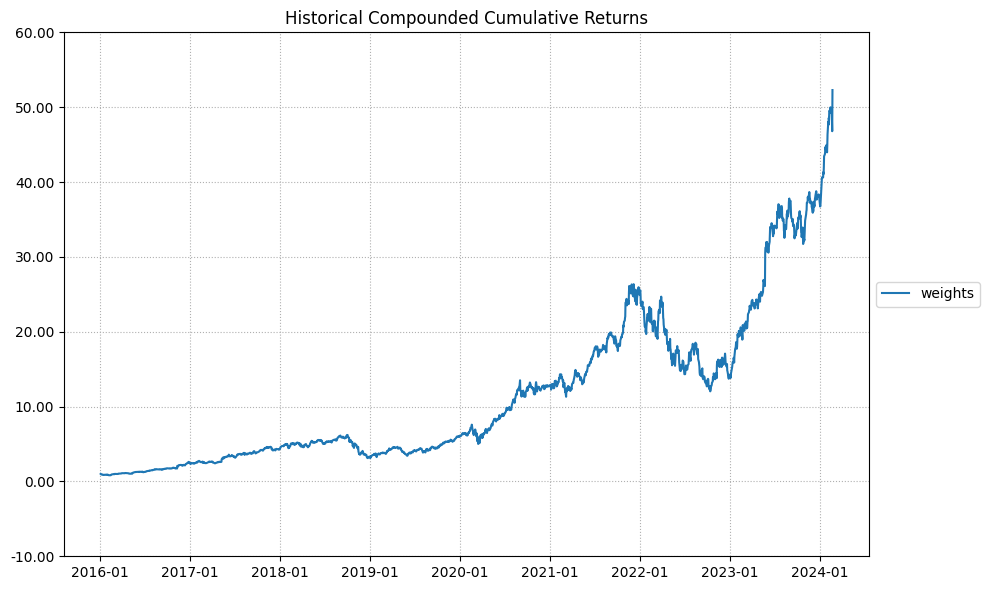

In [49]:
ax = rp.plot_series(returns=Y,
    w=w,
    cmap='tab20',
    height=6,
    width=10,
    ax=None)

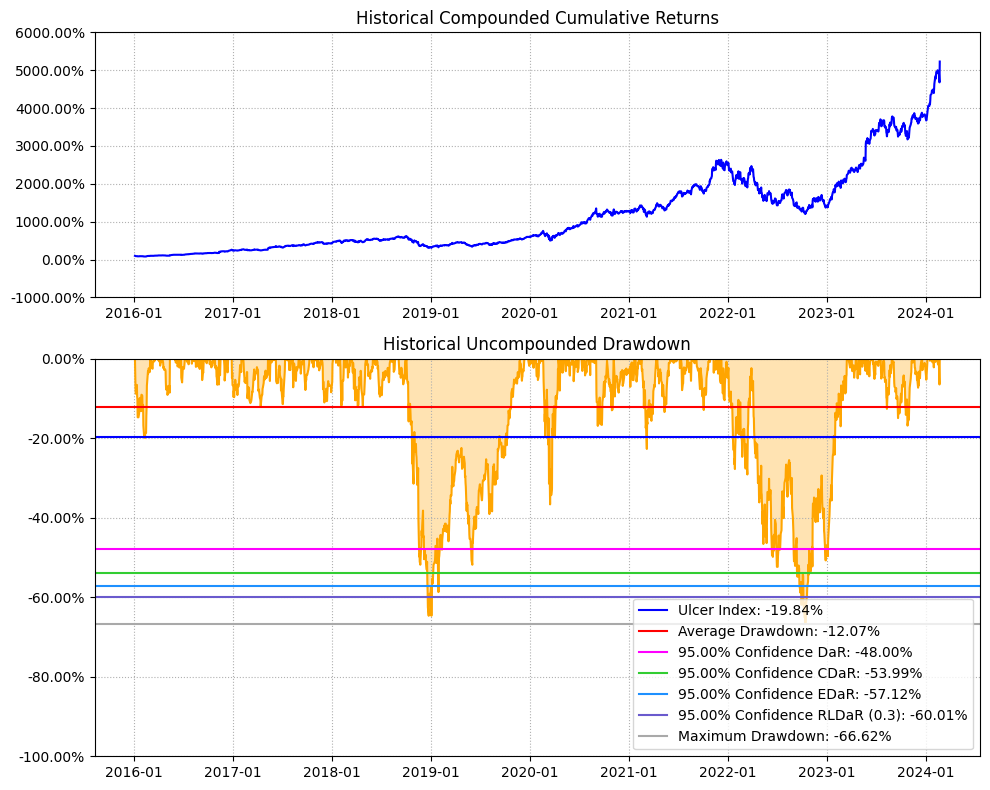

In [50]:
ax = rp.plot_drawdown(returns=Y,
    w=w,
    alpha=0.05,
    height=8,
    width=10,
    ax=None)

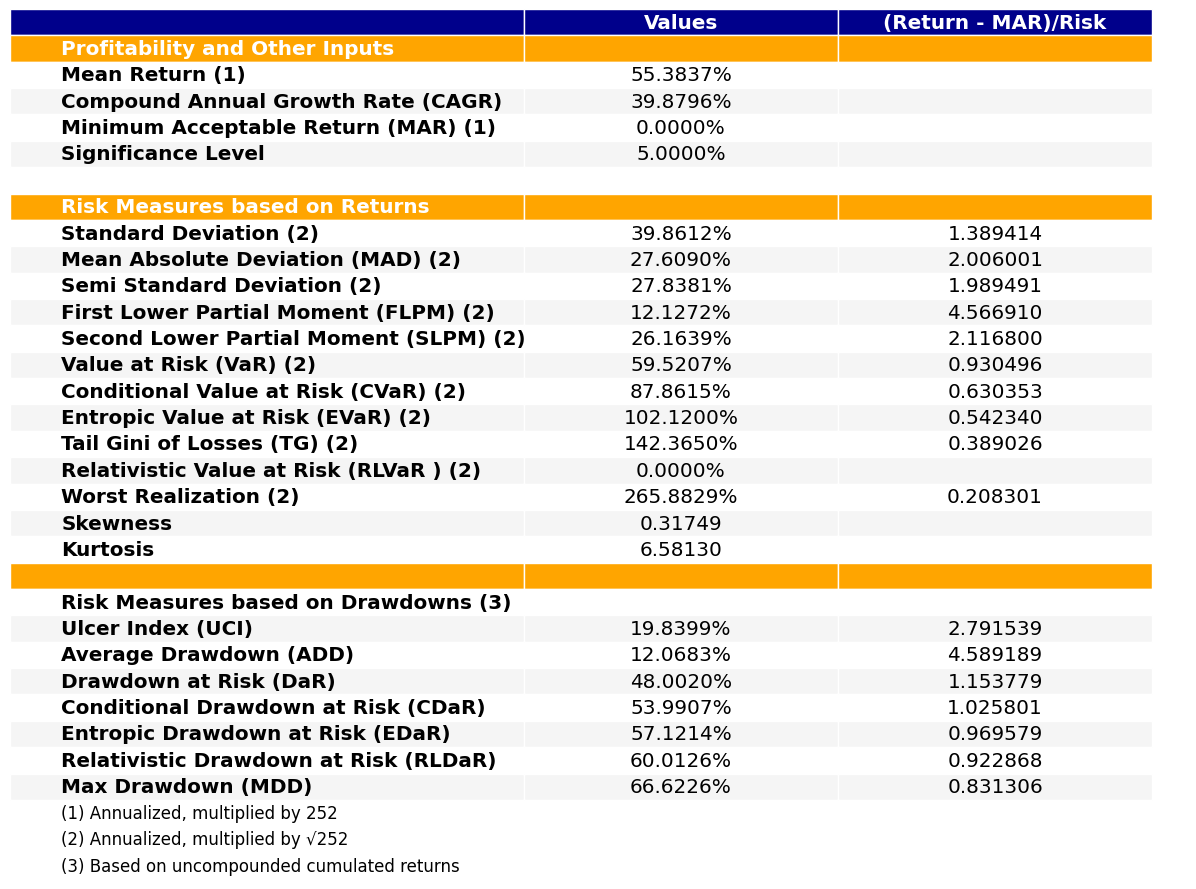

In [51]:
ax = rp.plot_table(returns=Y,
    w=w,
    MAR=0,
    alpha=0.05,
    ax=None)

In [55]:
rp.RiskFunctions.VaR_Hist(Y["^GDAXI"], alpha=0.05), rp.RiskFunctions.WR(Y["^GDAXI"])

(0.017744067000349917, 0.1223861487212149)

In [57]:
w

,weights
AAPL,30.4803%
NVDA,69.5197%
^GDAXI,0.0000%


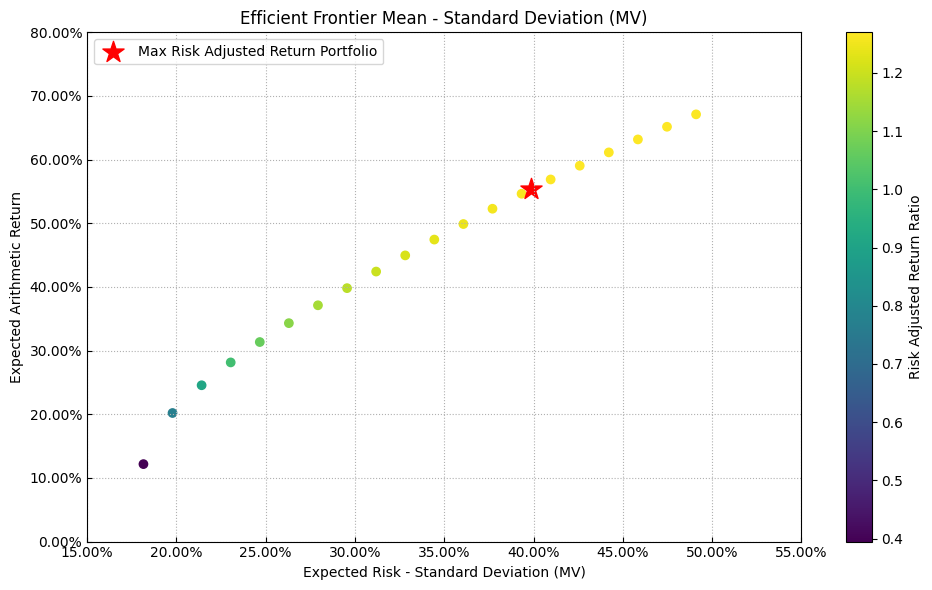

In [80]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0.05,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

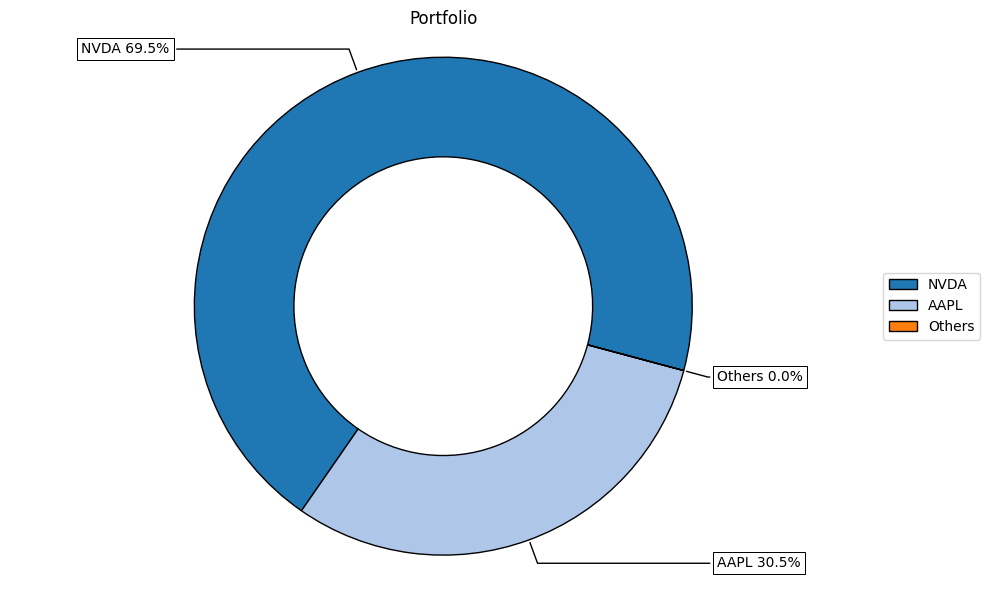

In [ ]:
ax = rp.plot_pie(w=w,
                 title='Portfolio',
                 height=6,
                 width=10,
                 cmap="tab20",
                 ax=None)

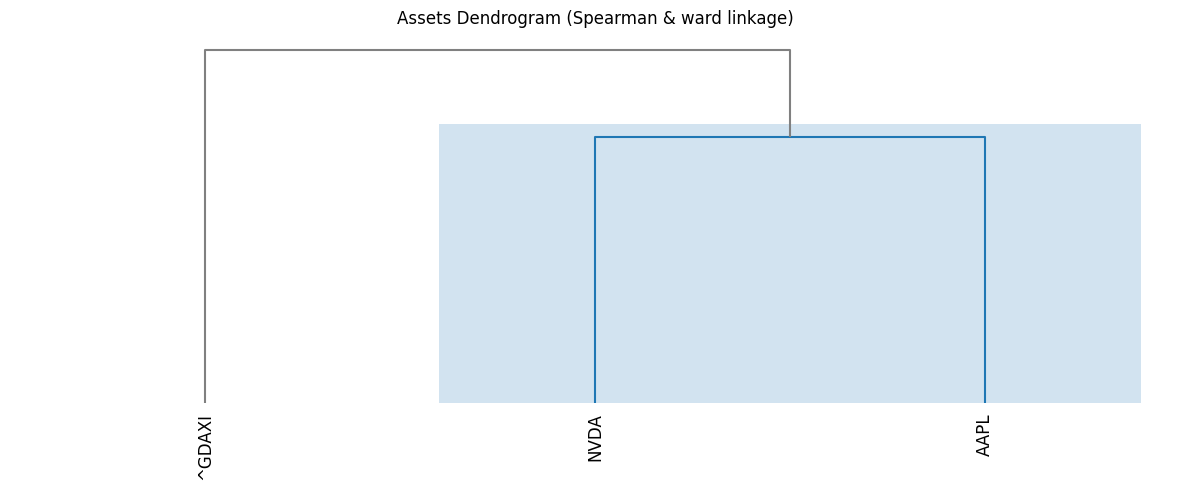

In [95]:
ax = rp.plot_dendrogram(returns=Y,
                        codependence='spearman',
                        linkage='ward',
                        k=2,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

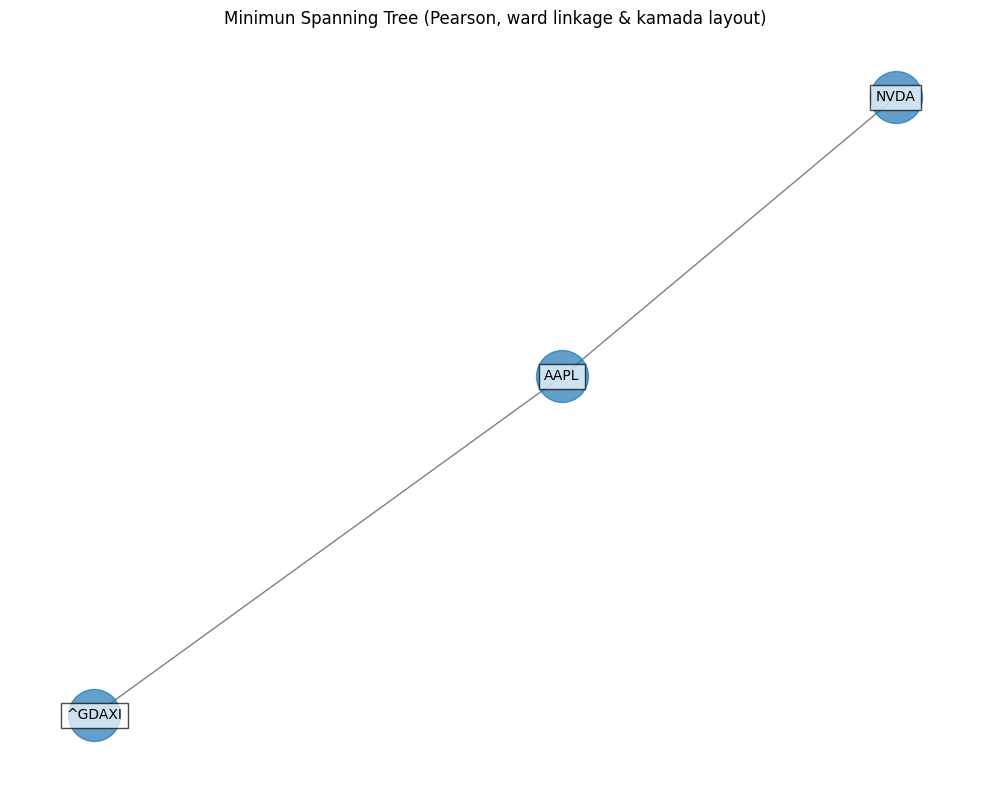

In [96]:
ax = rp.plot_network(returns=Y,
                     codependence="pearson",
                     linkage="ward",
                     k=None,
                     max_k=10,
                     alpha_tail=0.05,
                     leaf_order=True,
                     kind='kamada',
                     ax=None)

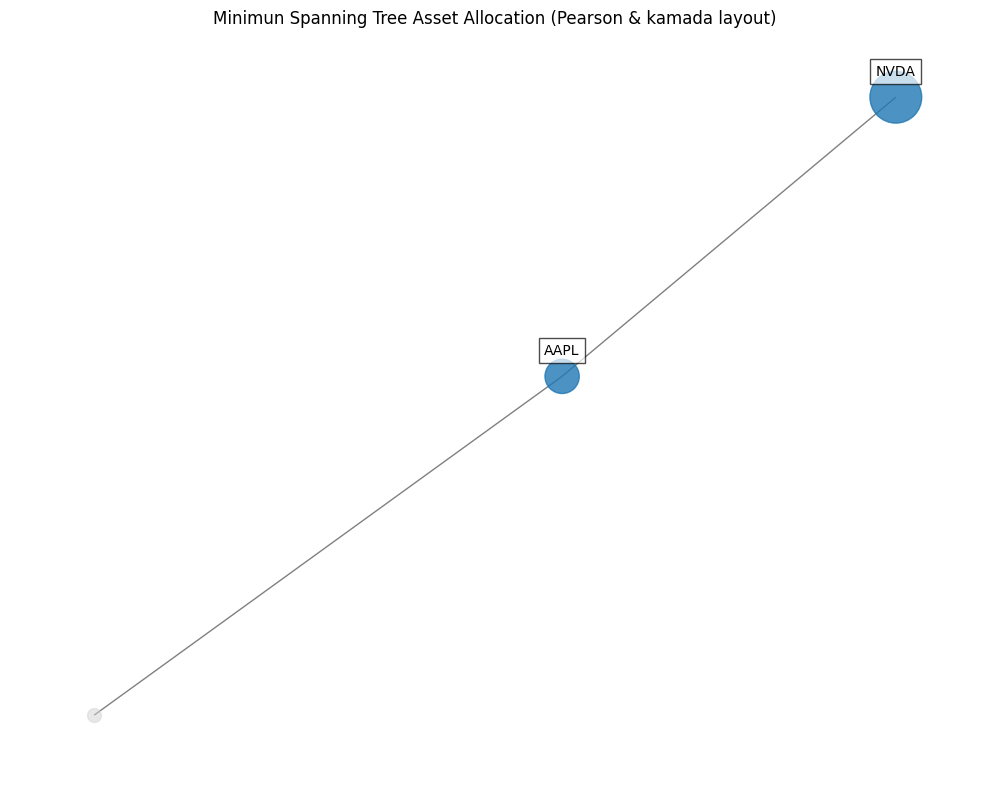

In [97]:
ax = rp.plot_network_allocation(returns=Y,
                                w=w1,
                                codependence="pearson",
                                linkage="ward",
                                alpha_tail=0.05,
                                leaf_order=True,
                                kind='kamada',
                                ax=None)

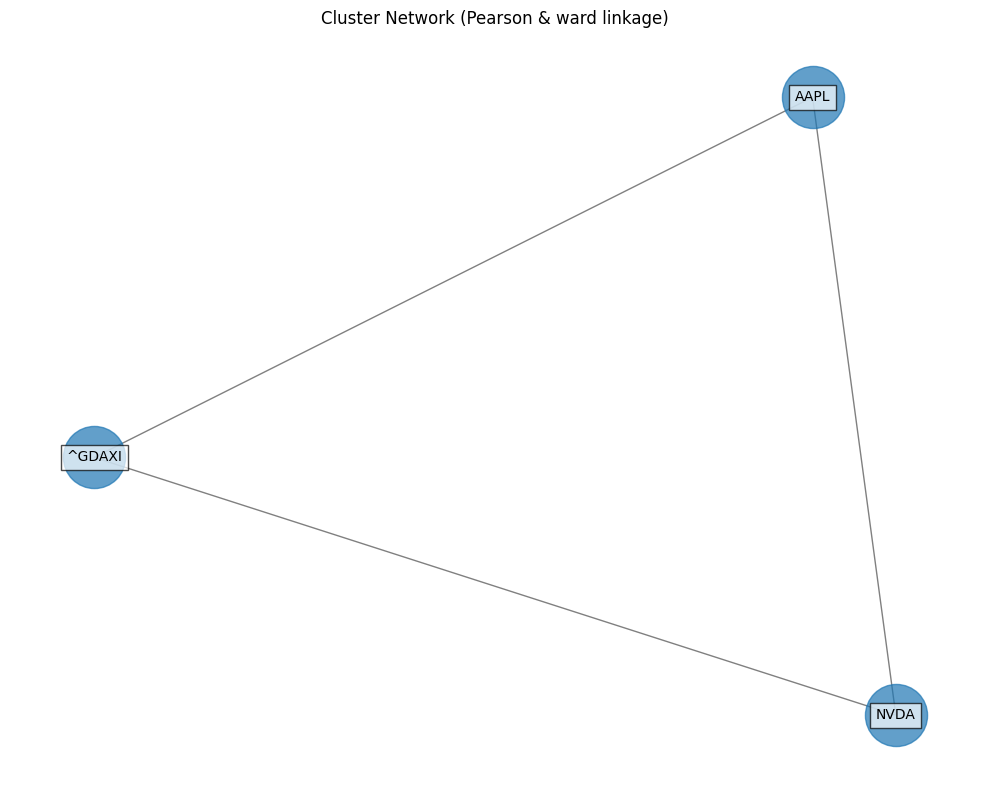

In [98]:
ax = rp.plot_clusters_network(returns=Y,
                              codependence="pearson",
                              linkage="ward",
                              k=None,
                              max_k=10,
                              ax=None)

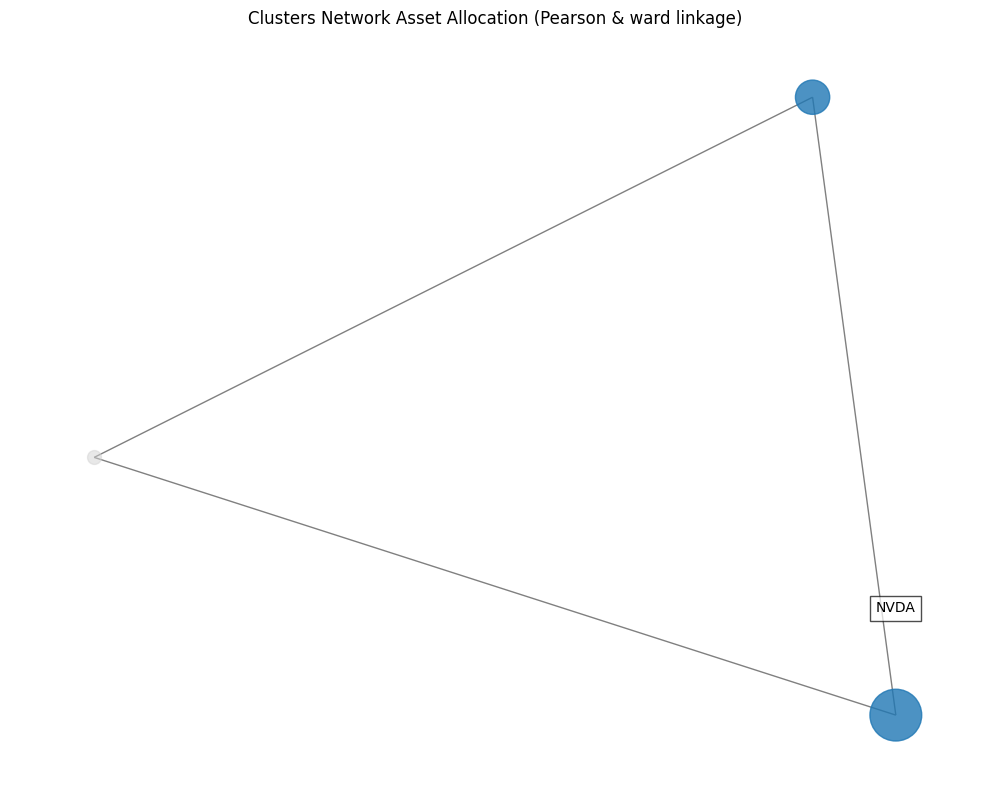

In [99]:
ax = rp.plot_clusters_network_allocation(returns=Y,
                                         w=w1,
                                         codependence="pearson",
                                         linkage="ward",
                                         k=None,
                                         max_k=10,
                                         ax=None)